In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('QVI_purchase_behaviour.csv')

In [3]:
df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
df.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [6]:
preium_total = df.loc[df['PREMIUM_CUSTOMER']=='Premium',:]

In [7]:
preium_total

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
6,1009,NEW FAMILIES,Premium
13,1019,OLDER SINGLES/COUPLES,Premium
16,1023,MIDAGE SINGLES/COUPLES,Premium
17,1024,YOUNG SINGLES/COUPLES,Premium
...,...,...,...
72608,880551,OLDER SINGLES/COUPLES,Premium
72611,2330031,MIDAGE SINGLES/COUPLES,Premium
72613,2330051,RETIREES,Premium
72628,2370001,OLDER SINGLES/COUPLES,Premium


In [8]:
df.PREMIUM_CUSTOMER.unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [9]:
gk = df.groupby('PREMIUM_CUSTOMER')

In [10]:
gk2 = gk.nunique()

In [11]:
gk2

,LYLTY_CARD_NBR,LIFESTAGE
PREMIUM_CUSTOMER,,
Budget,24470,7
Mainstream,29245,7
Premium,18922,7


In [12]:
gk2['LYLTY_CARD_NBR']

PREMIUM_CUSTOMER
Budget        24470
Mainstream    29245
Premium       18922
Name: LYLTY_CARD_NBR, dtype: int64

In [13]:
b=list(gk2['LYLTY_CARD_NBR'])

In [14]:
a = ['Budget', 'Mainstream', 'Premium']

([<matplotlib.patches.Wedge at 0x205c531cb80>,
 [Text(0.5393497553055417, 0.9586979928276956, 'Budget'),
  Text(-1.068483737056012, -0.2614239921025214, 'Mainstream'),
  Text(0.751739180577092, -0.8030493162846739, 'Premium')])

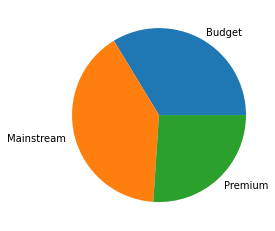

In [15]:
plt.pie(b,labels=a)

to find out the out liers


In [16]:
df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [17]:
import seaborn as sns

<AxesSubplot:xlabel='LIFESTAGE', ylabel='LYLTY_CARD_NBR'>

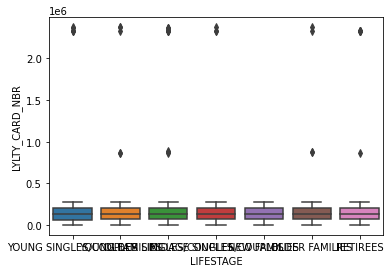

In [18]:
sns.boxplot(y= 'LYLTY_CARD_NBR', x = 'LIFESTAGE', data = df)

In [19]:
a = list(df['LYLTY_CARD_NBR'])

In [20]:
from scipy.stats import iqr
a = list(df['LYLTY_CARD_NBR'])
iqr(a, axis=0)

137173.0

<AxesSubplot:xlabel='LYLTY_CARD_NBR'>

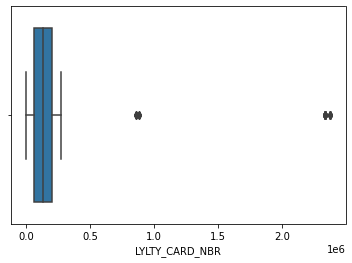

In [21]:
sns.boxplot(x = df['LYLTY_CARD_NBR'])

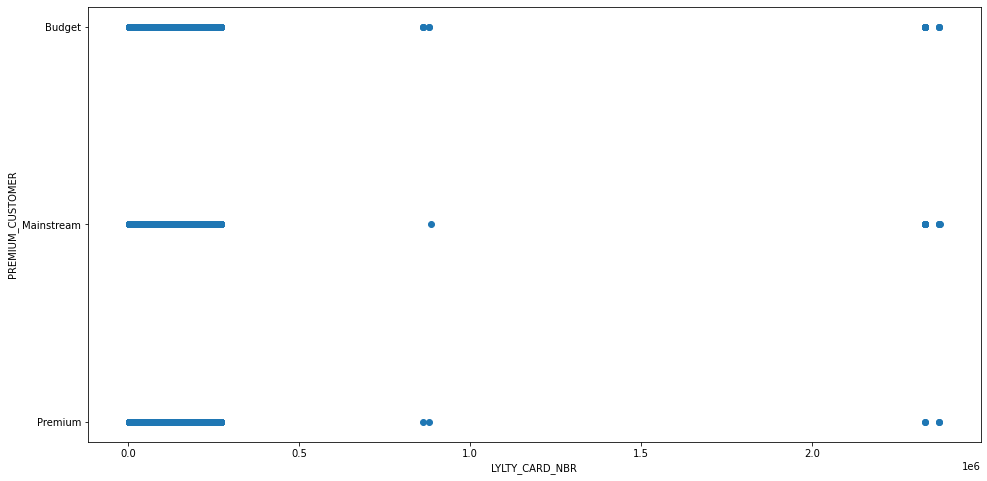

In [22]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['LYLTY_CARD_NBR'], df['PREMIUM_CUSTOMER'])
ax.set_xlabel('LYLTY_CARD_NBR')
ax.set_ylabel('PREMIUM_CUSTOMER')
plt.show()

In [23]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df.LYLTY_CARD_NBR))
print(z)

[ 1.50386531  1.50384306  1.50383194 ... 24.85824414 24.86058026
 24.89117242]


In [24]:
threshold = 3
print(np.where(z > 3))
q = np.where(z > 3)

(array([72603, 72604, 72605, 72606, 72607, 72608, 72609, 72610, 72611,
       72612, 72613, 72614, 72615, 72616, 72617, 72618, 72619, 72620,
       72621, 72622, 72623, 72624, 72625, 72626, 72627, 72628, 72629,
       72630, 72631, 72632, 72633, 72634, 72635, 72636], dtype=int64),)


In [25]:
for i in q:
    new = df.drop(df.index[i])
    print(new)


       LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0                1000   YOUNG SINGLES/COUPLES          Premium
1                1002   YOUNG SINGLES/COUPLES       Mainstream
2                1003          YOUNG FAMILIES           Budget
3                1004   OLDER SINGLES/COUPLES       Mainstream
4                1005  MIDAGE SINGLES/COUPLES       Mainstream
...               ...                     ...              ...
72598          272388   OLDER SINGLES/COUPLES          Premium
72599          272389   YOUNG SINGLES/COUPLES       Mainstream
72600          272390            NEW FAMILIES           Budget
72601          272391   YOUNG SINGLES/COUPLES       Mainstream
72602          272392  MIDAGE SINGLES/COUPLES          Premium

[72603 rows x 3 columns]


<AxesSubplot:xlabel='LYLTY_CARD_NBR'>

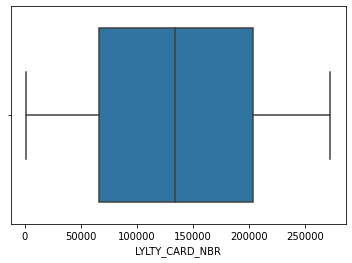

In [26]:
sns.boxplot(x = new['LYLTY_CARD_NBR'])

In [27]:
PC_group = (new.groupby('PREMIUM_CUSTOMER')).nunique()

In [28]:
b=list(PC_group['LYLTY_CARD_NBR'])

In [29]:
a = ['Budget', 'Mainstream', 'Premium']

In [30]:
PC_group

,LYLTY_CARD_NBR,LIFESTAGE
PREMIUM_CUSTOMER,,
Budget,24454,7
Mainstream,29233,7
Premium,18916,7


([<matplotlib.patches.Wedge at 0x205cf83c130>,
 [Text(0.539538330175677, 0.9585918788886345, 'Budget'),
  Text(-1.0685674156025093, -0.2610817464178113, 'Mainstream'),
  Text(0.7516399281240835, -0.8031422155817877, 'Premium')])

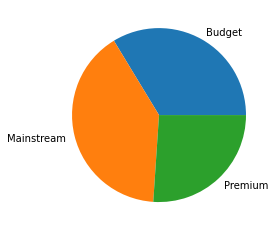

In [31]:
plt.pie(b,labels=a)

In [32]:
df_cat = new[['PREMIUM_CUSTOMER', 'LIFESTAGE']]

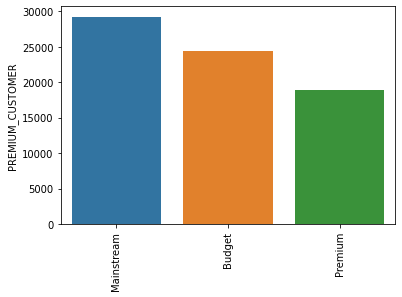

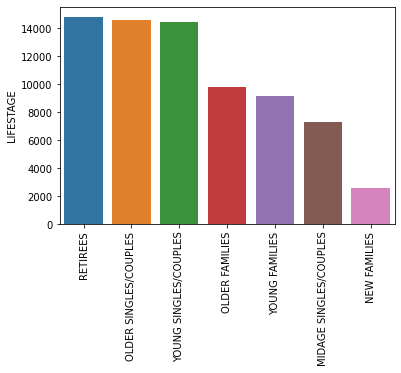

In [33]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90);
    plt.show()

In [34]:
new.describe()

,LYLTY_CARD_NBR
count,72603.000000
mean,135314.133052
std,79233.229824
min,1000.000000
25%,66191.000000
50%,134015.000000
75%,203349.500000
max,272392.000000


In [35]:
table = pd.pivot_table(new, index= 'LIFESTAGE', values = 'LYLTY_CARD_NBR',aggfunc=np.sum)

In [36]:
table

,LYLTY_CARD_NBR
LIFESTAGE,
MIDAGE SINGLES/COUPLES,985251036
NEW FAMILIES,342540489
OLDER FAMILIES,1318827557
OLDER SINGLES/COUPLES,1959609101
RETIREES,2013315112
YOUNG FAMILIES,1252931505
YOUNG SINGLES/COUPLES,1951737202


<AxesSubplot:xlabel='LIFESTAGE'>

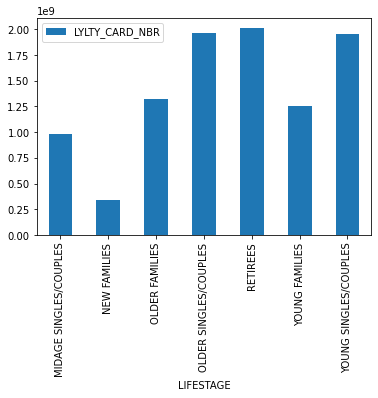

In [37]:
table.plot(kind = 'bar')